In [100]:
import pandas as pd
import numpy as np

## Regresión capital

In [101]:
def load_dataset(orig = False):
    if orig:
        return pd.read_csv("properati.csv")
    return pd.read_csv("properati_interacciones.csv")

In [102]:
data = load_dataset()

In [103]:
data[data.state_name == 'Capital Federal'].price_aprox_usd

0         62000.0
1         72000.0
2         95000.0
3        138000.0
4        195000.0
           ...   
32187    410000.0
32188    410000.0
32189    870000.0
32190    131500.0
32191    129000.0
Name: price_aprox_usd, Length: 32192, dtype: float64

In [115]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

import seaborn as sns
import matplotlib.pyplot as plt

palette = sns.color_palette("coolwarm", 2)

def train_test_error(dicotomical, categorical, numerical, target, Estimator = LinearRegression):
    # Filter to only check for capital federal
    data = load_dataset()
    mask = (data.state_name == 'Capital Federal') & (data.price_usd_per_m2 < 10000)
    #cluster = 'place_name'
    data = data.loc[mask]
    
    # Append dummy columns
    for column in dicotomical + categorical:
        dummies = pd.get_dummies(data[column], prefix = column, drop_first = True)
        data = data.join(dummies)
    
    dicotomical_dummy_cols = [name + '_True' for name in dicotomical]
    categorical_dummy_cols = [column for name in categorical for column in data.columns if name + '_' in column]
    
    feature_cols = dicotomical_dummy_cols + categorical_dummy_cols + numerical
    
    data = data.loc[:, feature_cols + [target]].dropna()
    index_train, index_test = train_test_split(data.index)
    
    # Aplico standard scaler a las numericas
    columns_to_scale = numerical
    scaler = StandardScaler()
    scaler.fit(data.loc[index_train, columns_to_scale])
    scaled_matrix = scaler.transform(data.loc[:, columns_to_scale])
    scaled_columns = [column + '_scaled' for column in columns_to_scale]
    scaled_dataframe = pd.DataFrame(scaled_matrix, columns = scaled_columns, index = data.index)
    
    data = data.join(scaled_dataframe)
    
    feature_cols_scaled = dicotomical_dummy_cols + categorical_dummy_cols + scaled_columns
    
    X = data.loc[:, feature_cols_scaled]
    y = data.loc[:, [target]]
    
    X_train, X_test, y_train, y_test = X.loc[index_train], X.loc[index_test], y.loc[index_train], y.loc[index_test]
    
    model = Estimator()
    model.fit(X_train, y_train)
    

    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    
    train_mae = mae(y_train, y_pred_train)
    test_mae = mae(y_test, y_pred_test)
    
    train_mse = mse(y_train, y_pred_train)
    test_mse = mse(y_test, y_pred_test)
    
    print("Train R2:", train_r2)
    print("Train MAE:", train_mae)
    print("Train MSE:", train_mse)
    print()
    print("Test R2:", test_r2)
    print("Test MAE:", test_mae)
    print("Test MSE:", test_mse)
    
    sns.barplot(x = [train_r2, test_r2], y = ['Train R2', 'Test R2'], palette = palette)
    plt.show()
    sns.barplot(x = [train_mse, test_mse], y = ['Train MSE', 'Test MSE'], palette = palette)
    plt.show()
    sns.barplot(x = [train_mae, test_mae], y = ['Train MAE', 'Test MAE'], palette = palette)
    
    return dict(zip(feature_cols_scaled, model.coef_[0]))

Train R2: 0.475726920602512
Train MAE: 122926.36993676136
Train MSE: 115083474343.19588

Test R2: 0.4050515342841734
Test MAE: 119235.30940633861
Test MSE: 58115891946.11338


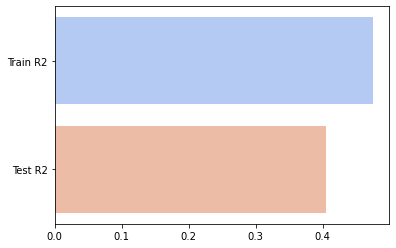

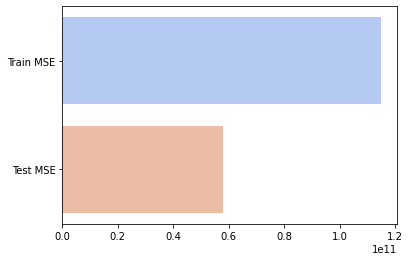

{'pileta_True': 42794.55033243658,
 'galeria_True': -99791.105785162,
 'seguridad_True': 46462.50139580836,
 'sotano_True': 19227.208403195764,
 'amenities_True': -4478.844098964473,
 'terraza_True': 10496.898814257409,
 'metrobus_True': -27061.548241180426,
 'subte_True': -33785.35815672105,
 'cochera_True': 74404.3906857415,
 'consultorio_True': -24525.53340470454,
 'property_type_apartment': 7303.76496433618,
 'property_type_house': 154387.68380034732,
 'property_type_store': 293442.7840729253,
 'place_name_Agronomía': -21349.832616251588,
 'place_name_Almagro': 6304.33839925786,
 'place_name_Balvanera': -27.886898257755092,
 'place_name_Barracas': -19107.94616417765,
 'place_name_Barrio Norte': 91442.77869785212,
 'place_name_Belgrano': 116674.37914514804,
 'place_name_Boca': -3112.4627003593923,
 'place_name_Boedo': 31906.040783473232,
 'place_name_Caballito': 1508.9977178485642,
 'place_name_Capital Federal': -4267.266310105639,
 'place_name_Catalinas': 72442.36401736806,
 'place

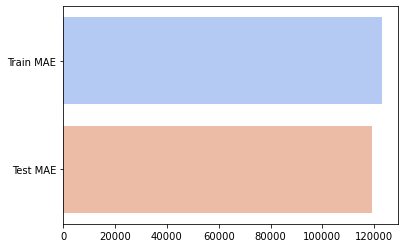

In [116]:
train_test_error(
    [
        'pileta',
        'galeria',
        'seguridad',
        'sotano',
        'amenities',
        'terraza',
        'metrobus',
        'subte',
        'cochera',
        'consultorio'
    ],
    [
        'property_type',
        'place_name',
    ],
    [
        'surface_covered_in_m2',
        'surface_total_in_m2',
        'rooms_3'
    ],
    'price_aprox_usd'
)

Train R2: 0.4759625111921292
Train MAE: 120102.14741715489
Train MSE: 111615243915.68909

Test R2: 0.4139932933080446
Test MAE: 123828.4777236001
Test MSE: 68716553292.44774


C:\Users\carlm\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1128353187647905.8, tolerance: 432648521924.8574
  positive)


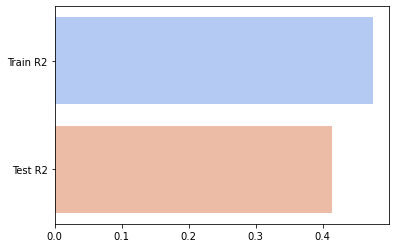

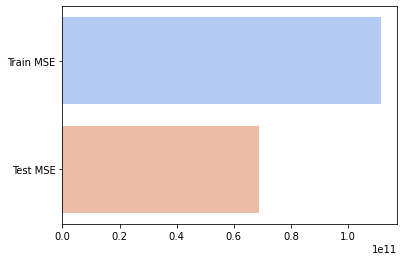

TypeError: zip argument #2 must support iteration

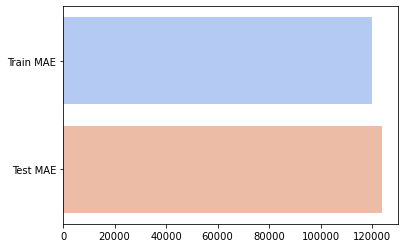

In [117]:
train_test_error(
    [
        'pileta',
        'galeria',
        'seguridad',
        'sotano',
        'amenities',
        'terraza',
        'metrobus',
        'subte',
        'cochera',
        'consultorio'
    ],
    [
        'property_type',
        'place_name',
    ],
    [
        'surface_covered_in_m2',
        'surface_total_in_m2',
        'rooms_3'
    ],
    'price_aprox_usd',
    Estimator = Lasso
)

In [ ]:
train_test_error(
    [
        'pileta',
        'galeria',
        'seguridad',
        'sotano',
        'amenities',
        'terraza',
        'metrobus',
        'subte',
        'cochera',
        'consultorio'
    ],
    [
        'property_type',
        'place_name',
    ],
    [
        'surface_covered_in_m2',
        'surface_total_in_m2',
        'rooms_3'
    ],
    'price_aprox_usd',
    Estimator = Ridge
)

In [ ]:
train_test_error(
    [
        'pileta',
        'galeria',
        'seguridad',
        'sotano',
        'amenities',
        'terraza',
        'metrobus',
        'subte',
        'cochera',
        'consultorio'
    ],
    [
        'property_type',
        'place_name',
    ],
    [
        'surface_covered_in_m2',
        'surface_total_in_m2',
        'rooms_3'
    ],
    'price_usd_per_m2'
)

In [ ]:
train_test_error(
    [
        'pileta',
        'galeria',
        'seguridad',
        'sotano',
        'amenities',
        'terraza',
        'metrobus',
        'subte',
        'cochera',
        'consultorio'
    ],
    [
        'property_type',
        'place_name',
    ],
    [
        'surface_covered_in_m2',
        'surface_total_in_m2',
        'rooms_3'
    ],
    'price_usd_per_m2',
    Estimator = Lasso
)

In [ ]:
train_test_error(
    [
        'pileta',
        'galeria',
        'seguridad',
        'sotano',
        'amenities',
        'terraza',
        'metrobus',
        'subte',
        'cochera',
        'consultorio'
    ],
    [
        'property_type',
        'place_name',
    ],
    [
        'surface_covered_in_m2',
        'surface_total_in_m2',
        'rooms_3'
    ],
    'price_usd_per_m2',
    Estimator = Ridge
)

## Sin superficie cubierta

Train R2: 0.4508220720069398
Train MAE: 554.5745553146623
Train MSE: 749504.6086154758

Test R2: 0.462750792427405
Test MAE: 561.5171452078208
Test MSE: 774836.1966718164


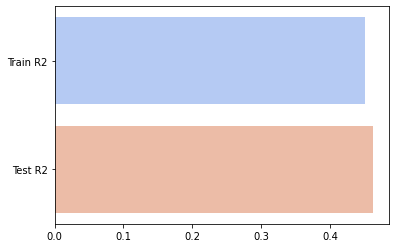

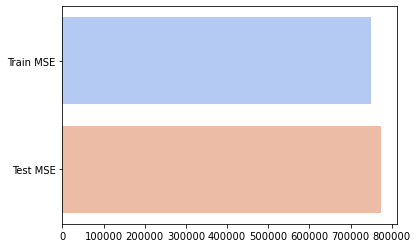

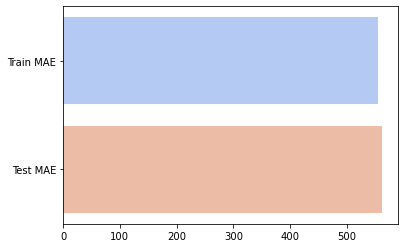

In [123]:
model = train_test_error(
    [
        'pileta',
        #'galeria',
        #'seguridad',
        'sotano',
        #'amenities',
        'terraza',
        'metrobus',
        'subte',
        'cochera',
        'consultorio'
    ],
    [
        'property_type',
        'place_name',
    ],
    [
        # 'surface_covered_in_m2',
        # 'surface_total_in_m2',
        #'interaccion_superficie_division',
        'rooms_3'
    ],
    'price_usd_per_m2'
)

In [119]:
model

{'pileta_True': 294.71470590423263,
 'galeria_True': -258.4444475317604,
 'seguridad_True': 208.19467020283005,
 'sotano_True': -125.58440965805406,
 'amenities_True': 133.7982911016818,
 'terraza_True': -110.80511288767002,
 'metrobus_True': -60.107321752857615,
 'subte_True': -92.02442742925132,
 'cochera_True': 226.5192948021401,
 'consultorio_True': -113.00534665627606,
 'property_type_apartment': 144.52487825682897,
 'property_type_house': -714.2889471050963,
 'property_type_store': 665.512953705037,
 'place_name_Agronomía': -3.7149916026831686,
 'place_name_Almagro': 212.7666581127415,
 'place_name_Balvanera': -54.82748933063897,
 'place_name_Barracas': -61.256488239348414,
 'place_name_Barrio Norte': 923.8666215315877,
 'place_name_Belgrano': 968.8180672506603,
 'place_name_Boca': -343.5324710757368,
 'place_name_Boedo': 462.1812944543567,
 'place_name_Caballito': 299.0685414182192,
 'place_name_Capital Federal': -18.478513557507426,
 'place_name_Catalinas': 558.5207504491882,
 